In [2]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder

dataset_path = r'C:\Users\india\OneDrive\Desktop\final dataset\Respiratory_Sound_Database\Respiratory_Sound_Database'
max_length = 1723  # Maximum length of the features

def extract_features(file_path):
    # Load the audio file
    audio, sr = librosa.load(file_path, sr=None)
    
    # Extract features using librosa
    # Modify the feature extraction process based on your requirements
    # Example: Computing mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    
    # Pad or truncate the features to a fixed length
    if mel_spectrogram.shape[1] < max_length:
        pad_width = max_length - mel_spectrogram.shape[1]
        mel_spectrogram = np.pad(mel_spectrogram, pad_width=((0, 0), (0, pad_width)))
    elif mel_spectrogram.shape[1] > max_length:
        mel_spectrogram = mel_spectrogram[:, :max_length]
    
    return mel_spectrogram

# List all audio files in the dataset directory
audio_files = os.listdir(os.path.join(dataset_path, 'audio_and_txt_files'))

features = []
labels = []

for audio_file in audio_files:
    if audio_file.endswith('.wav'):
        file_path = os.path.join(dataset_path, 'audio_and_txt_files', audio_file)
        file_features = extract_features(file_path)
        features.append(file_features)
        # Assuming the label can be extracted from the filename
        label = audio_file.split('_')[-1].split('.')[0]
        labels.append(label)

# Convert the features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Perform the necessary preprocessing and model training using the features and labels
# ...

# Fit the label encoder with the training labels
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Save the label encoder classes
np.save(r"C:\Users\india\OneDrive\Desktop\final dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\label_encoder_classes.npy", label_encoder.classes_)


In [3]:
# Perform the necessary preprocessing and model training using the features and labels
# ...
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Preprocessing
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalize the features
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Encode the categorical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)
y_train_categorical = to_categorical(y_train_encoded, num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes)

# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Model Training
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_categorical, validation_split=0.2, epochs=10, batch_size=32)

# Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
model.save(r"C:\Users\india\OneDrive\Desktop\final dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\my_model.h5")

Epoch 1/10
19/19 [==============================] - 28s 1s/step - loss: 2.7048 - accuracy: 0.6276 - val_loss: 0.6623 - val_accuracy: 0.7297
Epoch 2/10
19/19 [==============================] - 25s 1s/step - loss: 0.4707 - accuracy: 0.8265 - val_loss: 0.6285 - val_accuracy: 0.8176
Epoch 3/10
19/19 [==============================] - 26s 1s/step - loss: 0.3937 - accuracy: 0.8367 - val_loss: 0.5348 - val_accuracy: 0.8243
Epoch 4/10
19/19 [==============================] - 26s 1s/step - loss: 0.3181 - accuracy: 0.8707 - val_loss: 0.6010 - val_accuracy: 0.8243
Epoch 5/10
19/19 [==============================] - 25s 1s/step - loss: 0.2802 - accuracy: 0.8895 - val_loss: 0.5347 - val_accuracy: 0.8243
Epoch 6/10
19/19 [==============================] - 25s 1s/step - loss: 0.2508 - accuracy: 0.8946 - val_loss: 0.6078 - val_accuracy: 0.8243
Epoch 7/10
19/19 [==============================] - 25s 1s/step - loss: 0.2236 - accuracy: 0.9099 - val_loss: 0.6389 - val_accuracy: 0.8311
Epoch 8/10
19/19 [==

Epoch 1/10
19/19 [==============================] - 27s 1s/step - loss: 0.1683 - accuracy: 0.9337 - val_loss: 0.7268 - val_accuracy: 0.8311
Epoch 2/10
19/19 [==============================] - 26s 1s/step - loss: 0.1561 - accuracy: 0.9320 - val_loss: 0.7312 - val_accuracy: 0.8311
Epoch 3/10
19/19 [==============================] - 26s 1s/step - loss: 0.1471 - accuracy: 0.9388 - val_loss: 0.7631 - val_accuracy: 0.8446
Epoch 4/10
19/19 [==============================] - 24s 1s/step - loss: 0.1456 - accuracy: 0.9303 - val_loss: 0.8419 - val_accuracy: 0.8514
Epoch 5/10
19/19 [==============================] - 25s 1s/step - loss: 0.1372 - accuracy: 0.9422 - val_loss: 0.8191 - val_accuracy: 0.8446
Epoch 6/10
19/19 [==============================] - 25s 1s/step - loss: 0.1278 - accuracy: 0.9456 - val_loss: 0.8586 - val_accuracy: 0.8446
Epoch 7/10
19/19 [==============================] - 24s 1s/step - loss: 0.1263 - accuracy: 0.9473 - val_loss: 0.8736 - val_accuracy: 0.8446
Epoch 8/10
19/19 [==

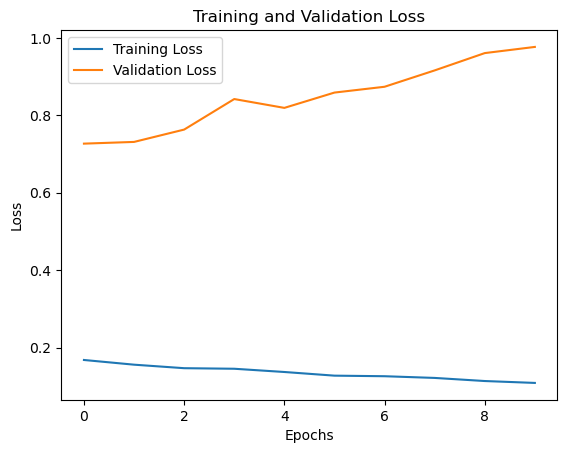

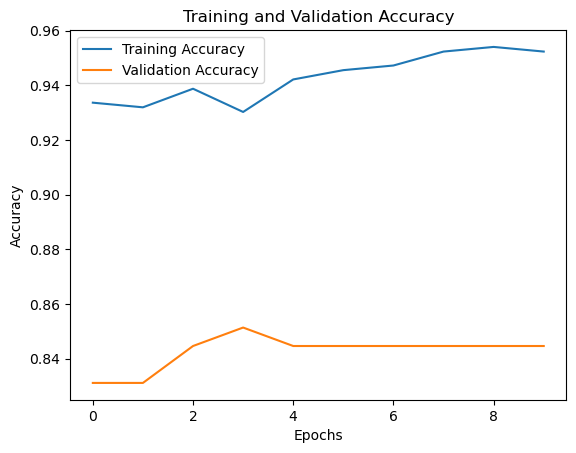

6/6 [==============================] - 2s 228ms/step


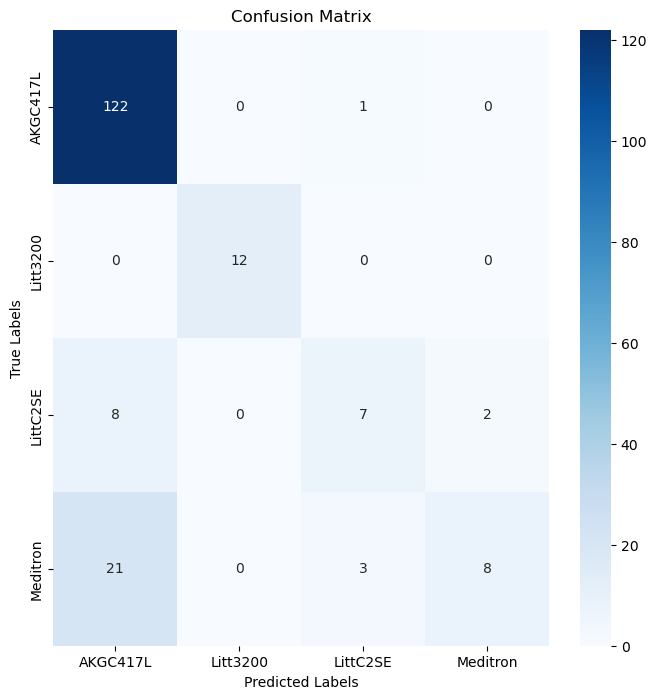

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Model Training
history = model.fit(X_train, y_train_categorical, validation_split=0.2, epochs=10, batch_size=32)

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Create Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
class_names = label_encoder.classes_
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [5]:
# Assuming you have the trained model, label_encoder, feature extraction function, and respiratory rate mapping

def classify_respiratory_rate(audio_file_path, respiratory_rate_mapping, threshold):
    # Extract features from the audio file
    features = extract_features(audio_file_path)
    
    # Reshape the input data
    features = features.reshape(1, features.shape[0], features.shape[1], 1)
    
    # Make predictions
    predictions = model.predict(features)
    
    # Interpret the predictions
    predicted_class_index = np.argmax(predictions)
    predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]
    
    # Determine respiratory rate
    respiratory_rate = respiratory_rate_mapping.get(predicted_label)
    
    # Classify respiratory rate as normal or abnormal
    if respiratory_rate is not None and respiratory_rate <= threshold:
        classification = "Normal"
    else:
        classification = "Abnormal"
    
    return classification

# Provide the path to the newly given audio file
new_audio_file_path = r"C:\Users\india\Downloads\New Recording 3.wav"

respiratory_rate_mapping = {
    "AKGC417L": 18,  # Example mapping, replace with your own mapping
    "AKGC417M": 22,
    # Add more mappings for other classes
}

threshold = 20  # Example threshold, adjust as per your requirements

classification = classify_respiratory_rate(new_audio_file_path, respiratory_rate_mapping, threshold)
print(f"Respiratory Rate Classification: {classification}")


1/1 [==============================] - 0s 109ms/step
Respiratory Rate Classification: Normal


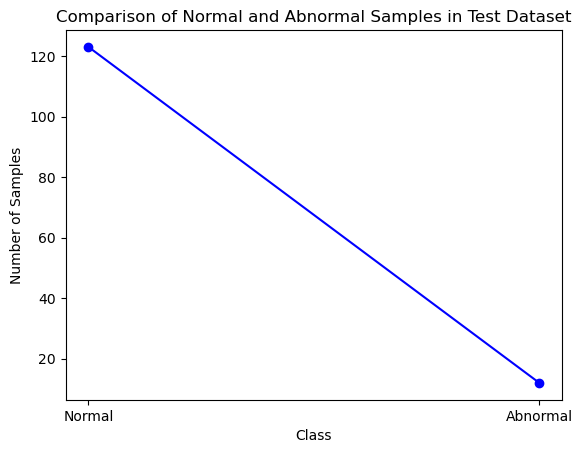

In [10]:
import matplotlib.pyplot as plt

# Count the number of normal and abnormal samples in the test dataset
normal_count = sum(y_test_encoded == 0)
abnormal_count = sum(y_test_encoded == 1)

# Create lists for x-axis and corresponding counts
labels = ['Normal', 'Abnormal']
counts = [normal_count, abnormal_count]

# Plot separate lines for normal and abnormal samples
plt.plot(labels, counts, marker='o', linestyle='-', color='blue')

# Add labels and title to the graph
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Comparison of Normal and Abnormal Samples in Test Dataset')

# Display the graph
plt.show()


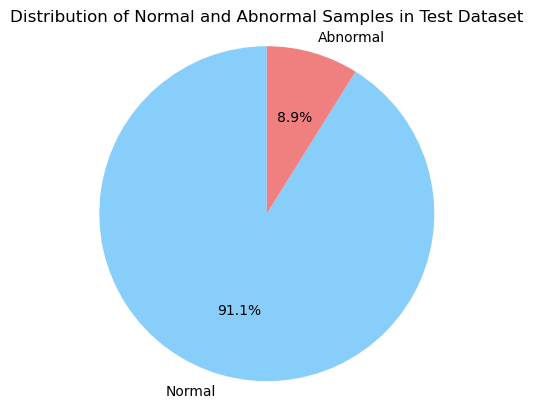

In [14]:

import matplotlib.pyplot as plt

# Count the number of normal and abnormal samples in the test dataset
normal_count = sum(y_test_encoded == 0)
abnormal_count = sum(y_test_encoded == 1)

# Create a list of counts
counts = [normal_count, abnormal_count]

# Define labels for the pie chart
labels = ['Normal', 'Abnormal']

# Define colors for the pie chart
colors = ['lightskyblue', 'lightcoral']

# Create the pie chart
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Distribution of Normal and Abnormal Samples in Test Dataset')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

